# Reading the readme file

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

Reading and Understanding the data

In [3]:
import pandas as pd

# Load the dataset
data_path = "day.csv"
bike_sharing_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and the data types of each column
df_head = bike_sharing_data.head()
df_info = bike_sharing_data.info()

df_head, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  01-01-2018       1   0     1        0        6           0   
 1        2  02-01-2018       1   0     1        0        0           0   
 2        3  03-01-2018       1   0     1        0        1           1   
 3        4  04-01-2018       1   0     1        0        2           1   
 4        5  05-01-2018       1   0     1        0        3           1   
 
    weathersit       temp     atemp      hum  windspeed  casual  registered  \
 0           2  14.110847  18.18125  80.5833  10.749882     331         654   
 1           2  14.902598  17.68695  69.6087  16.652113     131         670   
 2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
 3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
 4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

In [4]:
# Convert 'dteday' to datetime format
bike_sharing_data['dteday'] = pd.to_datetime(bike_sharing_data['dteday'])

# Convert 'season' and 'weathersit' to categorical with appropriate labels
season_labels = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weather_labels = {
    1: 'clear',
    2: 'mist_cloudy',
    3: 'light_snow_rain',
    4: 'heavy_rain_ice'
}

bike_sharing_data['season'] = bike_sharing_data['season'].map(season_labels)
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map(weather_labels)

# Drop the 'instant' column
bike_sharing_data.drop(['instant'], axis=1, inplace=True)

# Check the transformation
bike_sharing_data.head()


C:\Users\tejag\AppData\Local\Temp\ipykernel_37548\2377879028.py:2: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  bike_sharing_data['dteday'] = pd.to_datetime(bike_sharing_data['dteday'])
C:\Users\tejag\AppData\Local\Temp\ipykernel_37548\2377879028.py:2: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  bike_sharing_data['dteday'] = pd.to_datetime(bike_sharing_data['dteday'])
C:\Users\tejag\AppData\Local\Temp\ipykernel_37548\2377879028.py:2: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  bike_sharing_data['dteday'] = pd.to_datetime(bike_sharing_data['dteday'])
C:\Users\tejag\AppData\Local\Temp\ipykernel_37548\2377879028.py:2: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=T

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking latest shape
bike_sharing_data.shape

(730, 15)

In [6]:
# checking for any nulls
bike_sharing_data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No nulls can be seen from above

In [7]:
# One-hot encode the categorical variables 'season' and 'weathersit'
bike_sharing_data_encoded = pd.get_dummies(bike_sharing_data, columns=['season', 'weathersit'], drop_first=True)

# Now let's check the dataset after encoding
bike_sharing_data_encoded.head()


,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2018-02-01,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,2018-03-01,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,2018-04-01,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,2018-05-01,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='temp'>

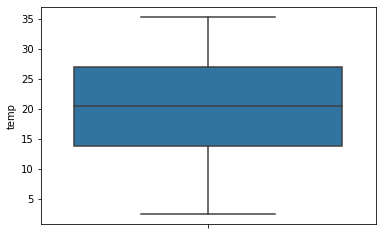

In [9]:
#Handling Outliers for numerical columns
sns.boxplot(y='temp', data=bike_sharing_data_encoded)

<AxesSubplot:ylabel='atemp'>

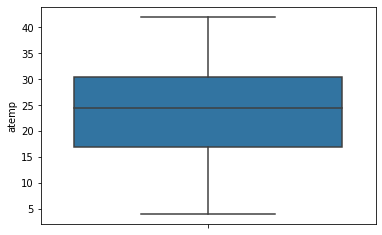

In [10]:
sns.boxplot(y='atemp', data=bike_sharing_data_encoded)

<AxesSubplot:ylabel='hum'>

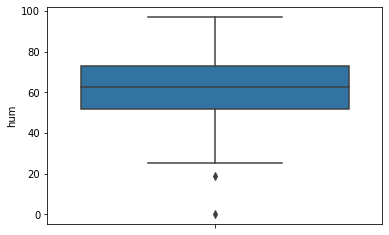

In [11]:
sns.boxplot(y='hum', data=bike_sharing_data_encoded)

<AxesSubplot:ylabel='windspeed'>

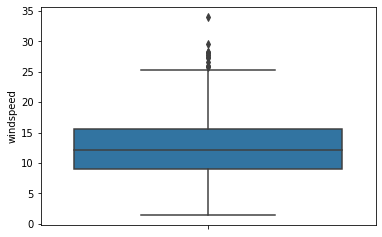

In [12]:
sns.boxplot(y='windspeed', data=bike_sharing_data_encoded)

There are not major outliers to be handled

# Exploratory Data Analysis

Analyzing categorical data

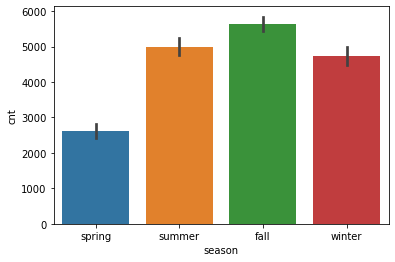

In [13]:
sns.barplot(x='season',y='cnt',data=bike_sharing_data)
plt.show()

In [14]:
#Fall Season have got highest bookings

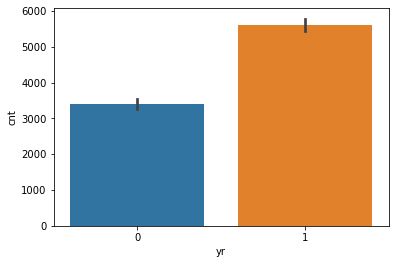

In [15]:
sns.barplot(x='yr',y='cnt',data=bike_sharing_data)
plt.show()

In [16]:
#2019 have got more bookings than 2018

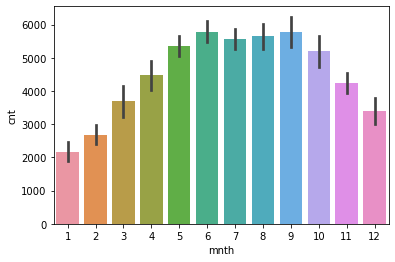

In [17]:
sns.barplot(x='mnth',y='cnt',data=bike_sharing_data)
plt.show()

In [18]:
#Bookings are more in months jun to sept

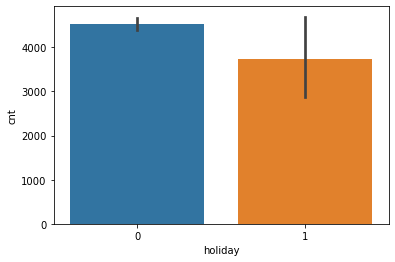

In [19]:
sns.barplot(x='holiday',y='cnt',data=bike_sharing_data)
plt.show()

In [20]:
# More bookings if it's not a holiday

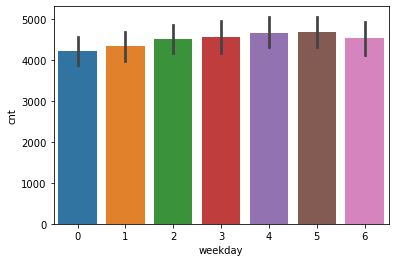

In [21]:
sns.barplot(x='weekday',y='cnt',data=bike_sharing_data)
plt.show()

In [22]:
#Wed to Sat has more bookings

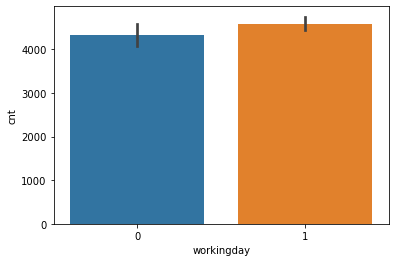

In [23]:
sns.barplot(x='workingday',y='cnt',data=bike_sharing_data)
plt.show()

In [24]:
# Working day has more bookings

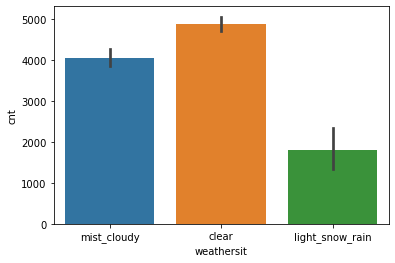

In [25]:
sns.barplot(x='weathersit',y='cnt',data=bike_sharing_data)
plt.show()

In [26]:
#More Bookings on a clear day

In [27]:
#Heatmap

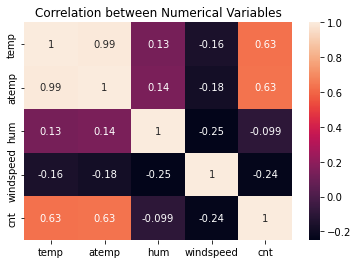

In [28]:
sns.heatmap(bike_sharing_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

There is direct relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

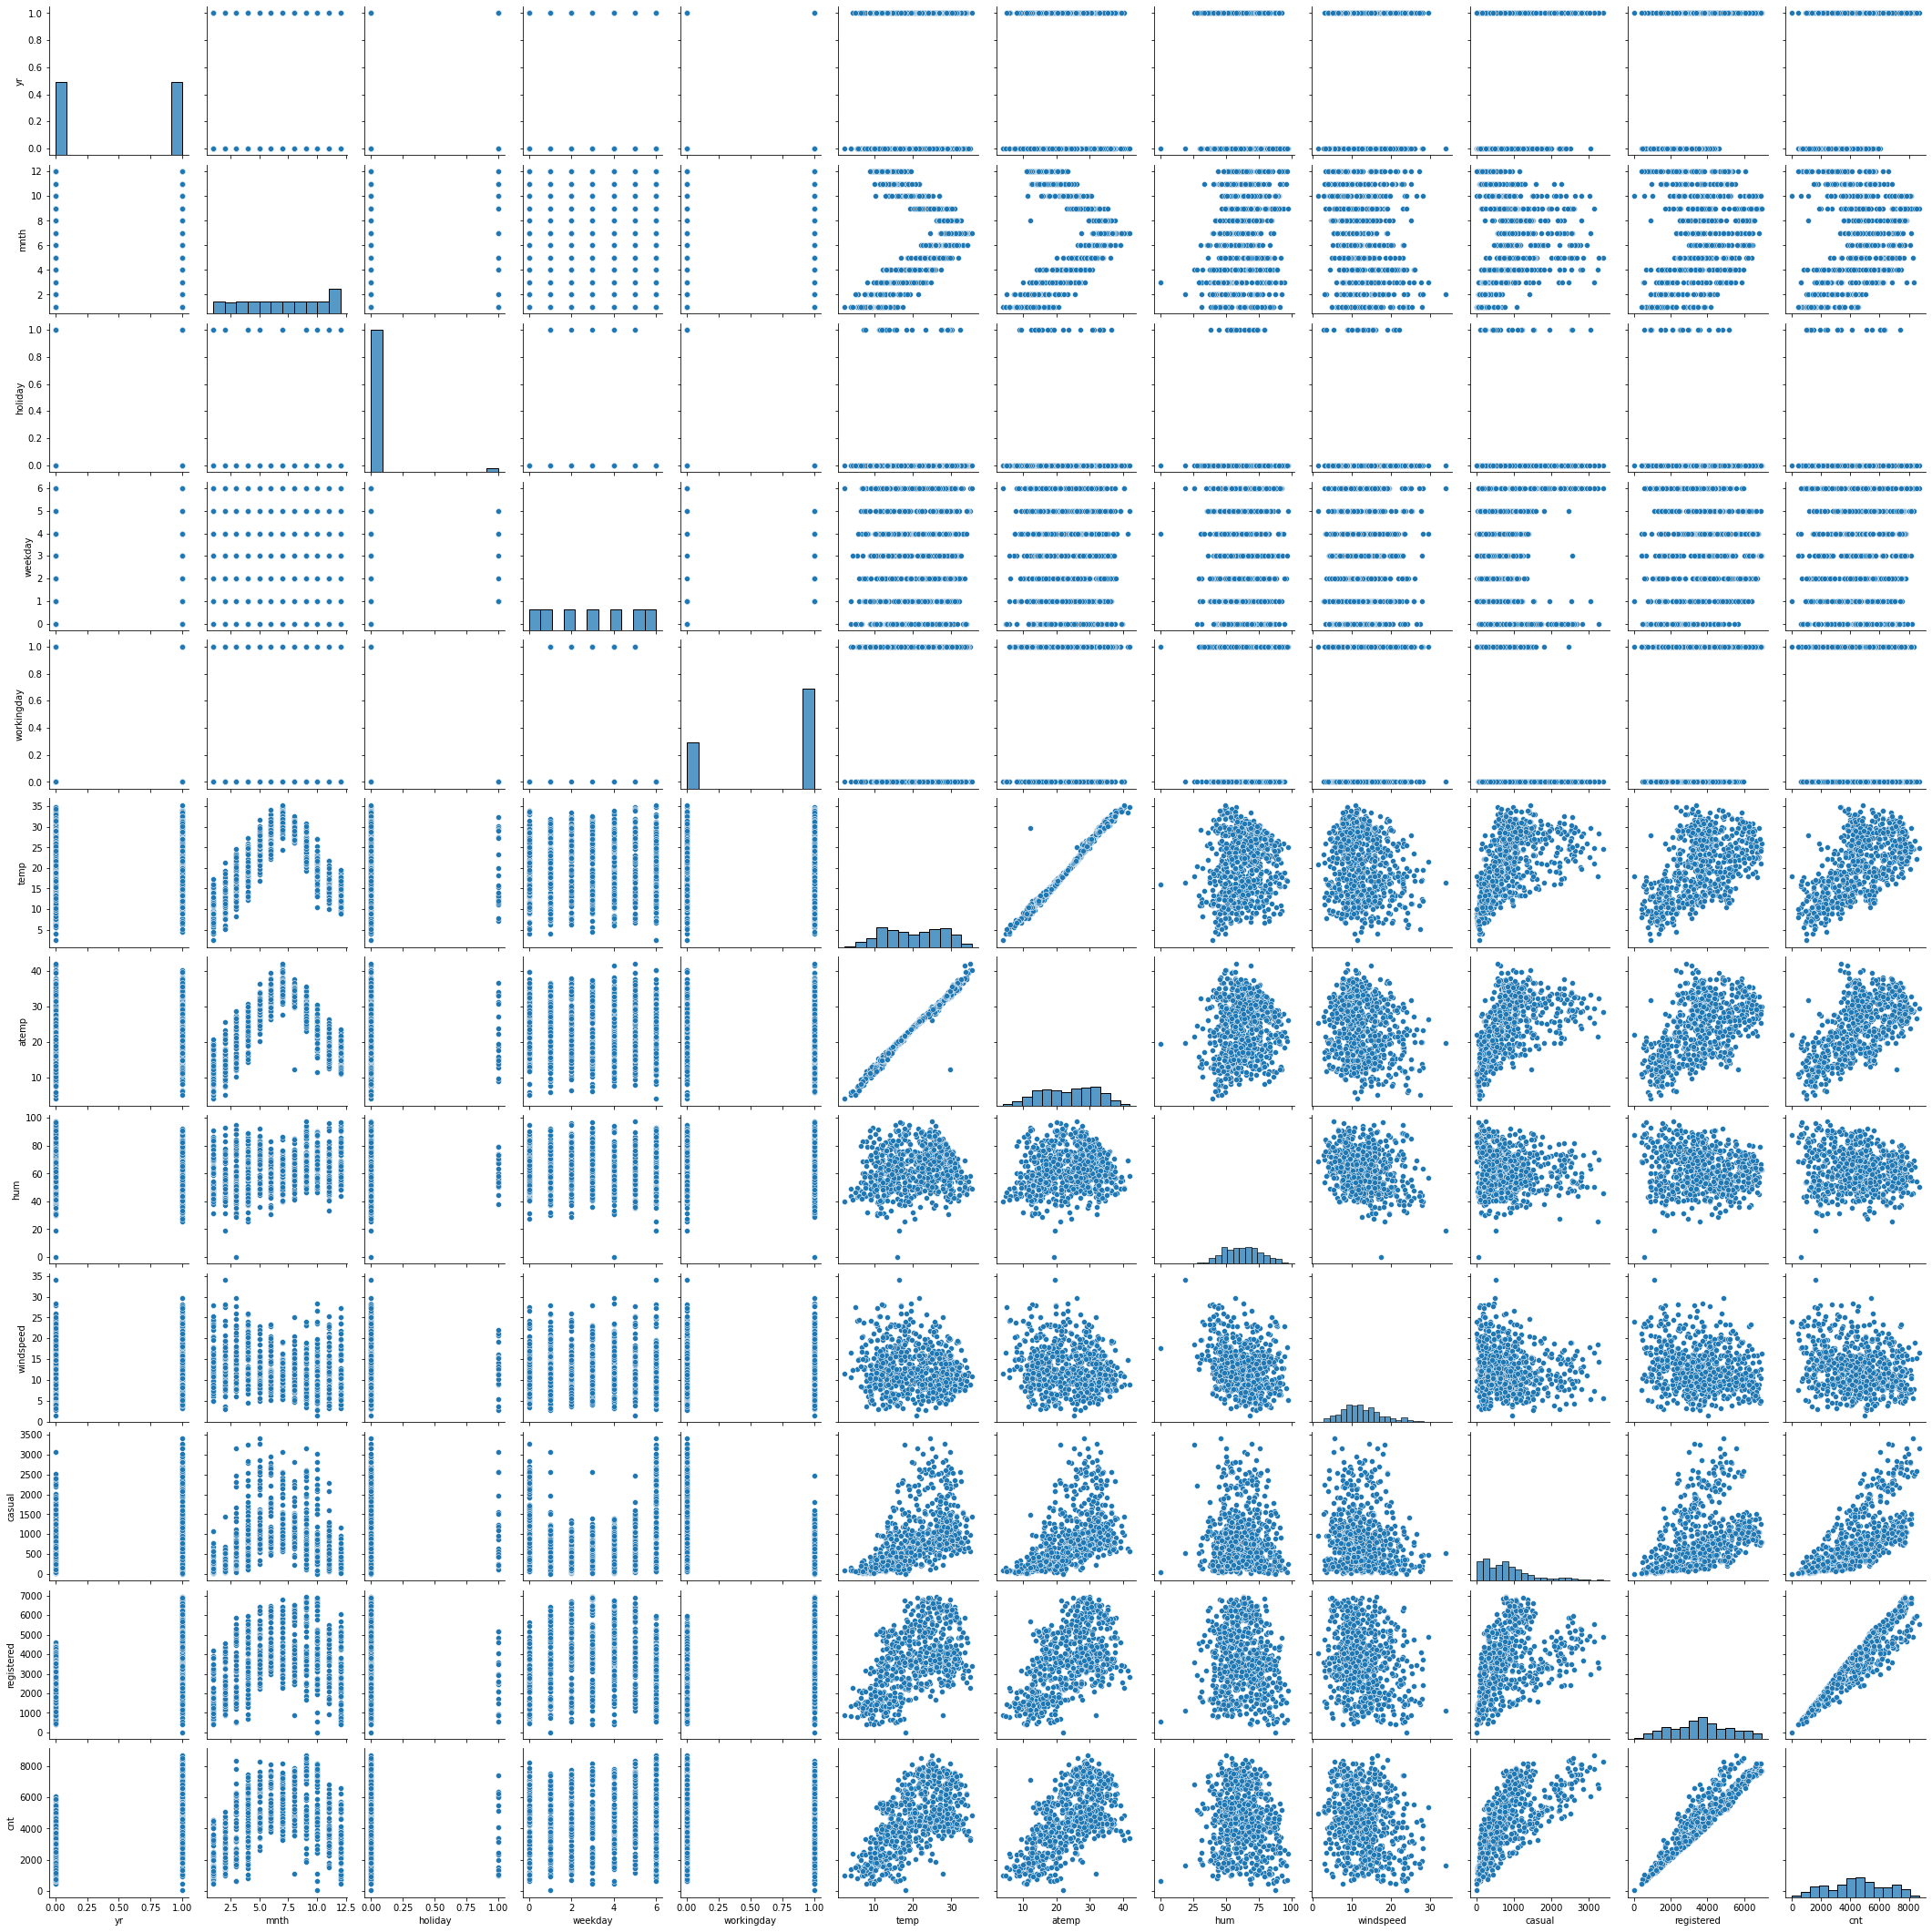

In [29]:
sns.pairplot(bike_sharing_data)
plt.show()

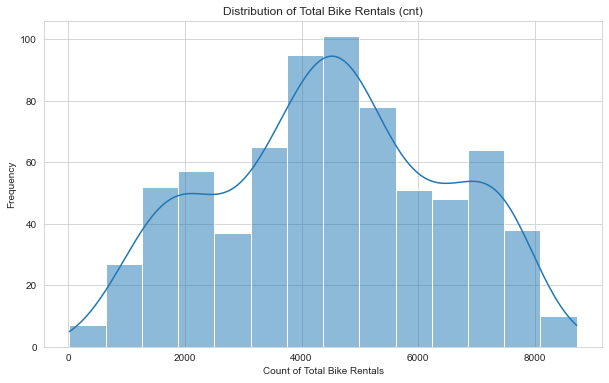

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(bike_sharing_data_encoded['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Count of Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()


When we look at the number of bikes rented each day, there's usually a common number that pops up more often than any other. But what's interesting is that there are more days when the number of rentals is on the lower side, rather than those really busy days when rentals shoot up. So, most of the time, the bike rental count is modest, with only a handful of days having very high rental numbers

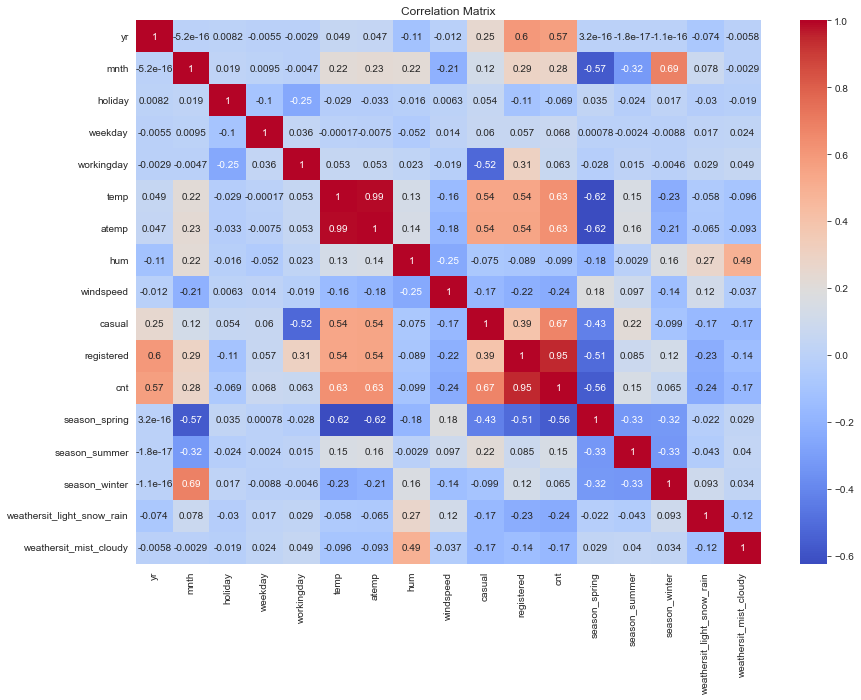

In [31]:
# Plotting a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = bike_sharing_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap provides a visual representation of the relationships between different variables. It shows that some variables are highly correlated with each other. For example, temp and atemp are highly correlated, as expected, since they both represent temperature.

From the heatmap, we can also see that the target variable cnt has a strong positive correlation with temp, atemp, and yr, indicating that these may be good predictors for the number of bike rentals.

In [32]:
from sklearn.model_selection import train_test_split

# Dropping the 'casual' and 'registered' columns as they are not predictors but actually sum up to 'cnt'
X = bike_sharing_data_encoded.drop(['cnt', 'casual', 'registered', 'dteday'], axis=1)
y = bike_sharing_data_encoded['cnt']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((584, 14), (146, 14), (584,), (146,))

Training features (X_train): 584 samples, 14 features
Test features (X_test): 146 samples, 14 features
Training target (y_train): 584 samples
Test target (y_test): 146 samples

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Predicting on the training data
y_train_pred = lin_reg.predict(X_train)

# Calculating R-squared and Mean Squared Error on the training data
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Predicting on the test data
y_test_pred = lin_reg.predict(X_test)

# Calculating R-squared on the test data
r2_test = r2_score(y_test, y_test_pred)

r2_train, mse_train, r2_test

(0.8214651977454049, 681233.908020097, 0.8520828533826301)

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of numerical variables to scale
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Fit and transform the training data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Only transform the test data
X_test[num_vars] = scaler.transform(X_test[num_vars])


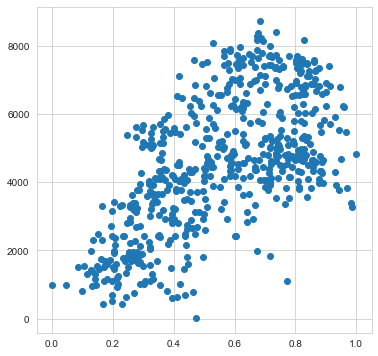

In [35]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(X_train.temp, y_train)
plt.show()


In [36]:
#Visualization confirms the positive correlation between temp and cnt

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr = LinearRegression()

# Initialize RFE with the Linear Regression model and desired number of features
rfe = RFE(lr, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Check the selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow_rain', 'weathersit_mist_cloudy'],
      dtype='object')

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data.sort_values(by="VIF", ascending=False)

# Calculate VIF for the dataset
vif_data = calculate_vif(X_train[selected_features])
vif_data

,feature,VIF
6,atemp,1302.365162
5,temp,1275.882938
7,hum,30.630453
1,mnth,15.267621
8,windspeed,6.045735
11,season_winter,4.511333
9,season_spring,4.092499
4,workingday,3.277080
3,weekday,3.070002
10,season_summer,2.590864


In [39]:
# Remove the 'atemp' feature from the selected features as based on the VIF
selected_features = [feature for feature in selected_features if feature != 'atemp']

# Re-calculate VIF for the updated dataset
vif_data = calculate_vif(X_train[selected_features])
print(vif_data)


                       feature        VIF
6                          hum  29.946715
5                         temp  16.606158
1                         mnth  15.266667
7                    windspeed   5.599251
10               season_winter   4.316837
8                season_spring   4.035969
4                   workingday   3.273820
3                      weekday   3.069344
9                season_summer   2.466289
12      weathersit_mist_cloudy   2.271599
0                           yr   2.085233
11  weathersit_light_snow_rain   1.299921
2                      holiday   1.125064


In [40]:
# Remove 'hum' and 'mnth' from the selected features due to high VIF
selected_features = [feature for feature in selected_features if feature not in ['hum', 'mnth']]

# Recalculate VIF for the updated dataset
vif_data = calculate_vif(X_train[selected_features])
print(vif_data)


                       feature       VIF
4                         temp  5.768076
5                    windspeed  5.444430
3                   workingday  3.254622
2                      weekday  3.028898
6                season_spring  2.209340
0                           yr  2.061172
7                season_summer  1.894359
8                season_winter  1.805930
10      weathersit_mist_cloudy  1.558943
1                      holiday  1.114675
9   weathersit_light_snow_rain  1.099552


In [41]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train[selected_features])

# Fitting the regression model
lr_model = sm.OLS(y_train, X_train_sm).fit()

# Print out the statistics
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     232.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          5.91e-203
Time:                        23:51:54   Log-Likelihood:                -4757.3
No. Observations:                 584   AIC:                             9539.
Df Residuals:                     572   BIC:                             9591.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1663.6320    270.843      6.142      0.000    1131.665    2195.599
yr                          2017.3534     70.255     28.715      0.000    1879.364    2155.343
holiday                     -504.8612    205.214     -2.460      0.014    -907.926    -101.797
weekday                       72.4077     17.452      4.149      0.000      38.130     106.686
workingday                   142.9892     77.672      1.841      0.066      -9.569     295.547
temp                        3963.7122    285.104     13.903      0.000    3403.733    4523.691
windspeed                   -958.1061    195.114     -4.910      0.000   -1341.334    -574.879
season_spring               -864.3853    177.044     -4.882      0.000   -1212.120    -516.650
season_summer                322.9471    112.949      2.859      0.004     101.102     544.792
season_winter                667.6139    137.780      4.846      0.000     396.998     938.230
weathersit_light_snow_rain -2417.6481    202.977    -11.911      0.000   -2816.320   -2018.976
weathersit_mist_cloudy      -614.3891     74.686     -8.226      0.000    -761.082    -467.696
==============================================================================
Omnibus:                       70.112   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.641
Skew:                          -0.653   Prob(JB):                     7.94e-36
Kurtosis:                       5.221   Cond. No.                         47.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

now looking at this statistics i can see
i can see VIF is in range
R-squared: This indicates that approximately 81.7% of the variability in bike rentals (cnt) can be explained by the model. This is a good R-squared value, 
Adjusted R-squared: This is a modified version of R-squared that has been adjusted for the number of predictors in the model. It's slightly lower than the R-squared, which is expected, but still indicates a strong model


# Assignment-based Subjective Question

# 1.	From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?


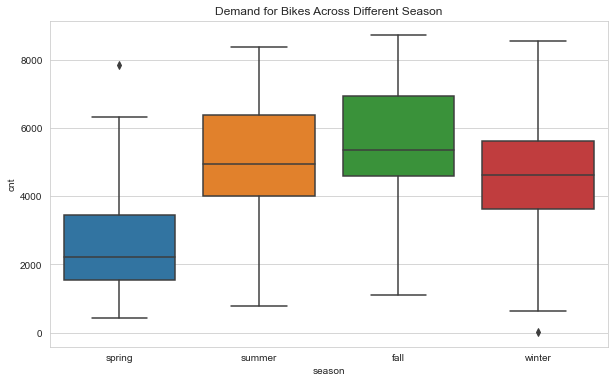

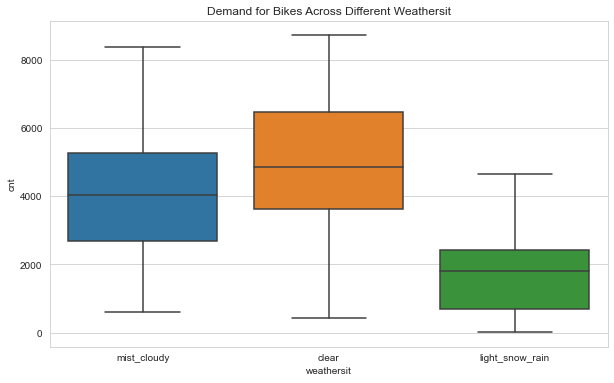

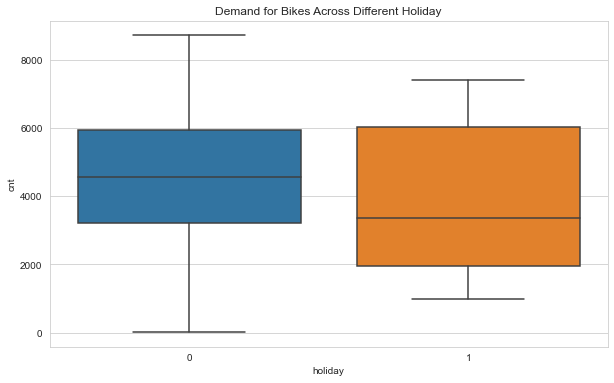

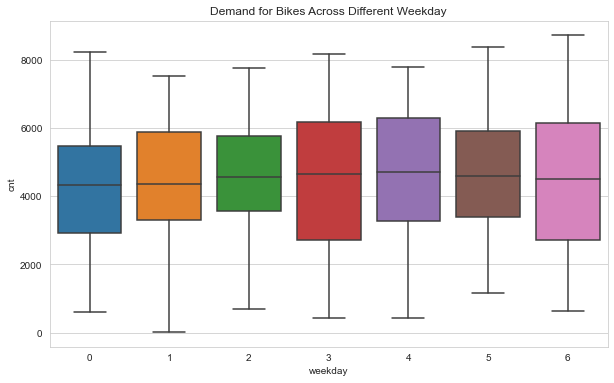

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'cnt' is the dependent variable representing bike demand
categorical_vars = ['season', 'weathersit', 'holiday', 'weekday']  # Replace with your categorical variables

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='cnt', data=bike_sharing_data)
    plt.title(f'Demand for Bikes Across Different {var.capitalize()}')
    plt.show()


In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For each categorical variable, perform ANOVA
for var in categorical_vars:
    model = ols('cnt ~ C(' + var + ')', data=bike_sharing_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA Table for {var}:')
    print(anova_table)
    print("\n")


ANOVA Table for season:
                 sum_sq     df           F        PR(>F)
C(season)  9.440517e+08    3.0  127.749824  1.894920e-66
Residual   1.788343e+09  726.0         NaN           NaN


ANOVA Table for weathersit:
                     sum_sq     df          F        PR(>F)
C(weathersit)  2.693719e+08    2.0  39.754686  4.123203e-17
Residual       2.463023e+09  727.0        NaN           NaN


ANOVA Table for holiday:
                  sum_sq     df         F    PR(>F)
C(holiday)  1.292000e+07    1.0  3.458668  0.063324
Residual    2.719475e+09  728.0       NaN       NaN


ANOVA Table for weekday:
                  sum_sq     df        F   PR(>F)
C(weekday)  1.795875e+07    6.0  0.79723  0.57222
Residual    2.714436e+09  723.0      NaN      NaN




# 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable

In [48]:
bike_sharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

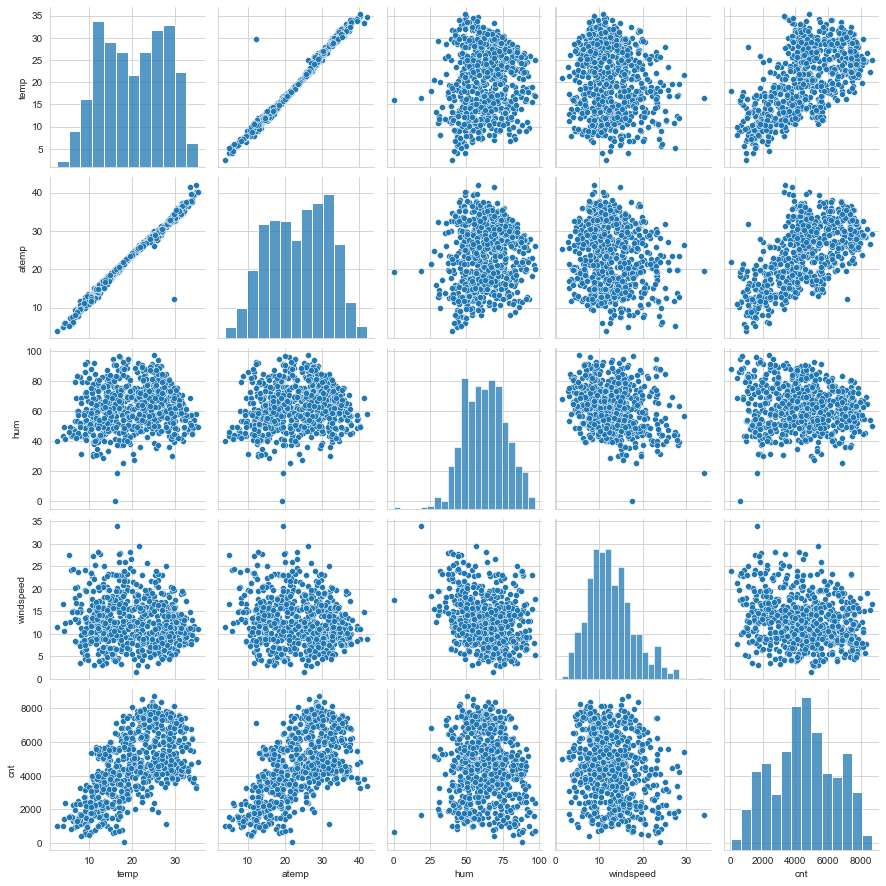

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
yr            0.569728
mnth          0.278191
weekday       0.067534
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Plotting the pair-plot
sns.pairplot(bike_sharing_data, vars=numerical_variables)
plt.show()

# Calculating correlation with the target variable
correlation = bike_sharing_data.corr()['cnt'].sort_values(ascending=False)
print(correlation)


# 4. How did you validate the assumptions of Linear Regression after building the model on the training set

In [51]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     232.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          5.91e-203
Time:                        00:40:18   Log-Likelihood:                -4757.3
No. Observations:                 584   AIC:                             9539.
Df Residuals:                     572   BIC:                             9591.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
# If lr_model is a statsmodels object
feature_list = lr_model.params.index.tolist()
print("Features used in model4:", feature_list)

Features used in model4: ['const', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_light_snow_rain', 'weathersit_mist_cloudy']


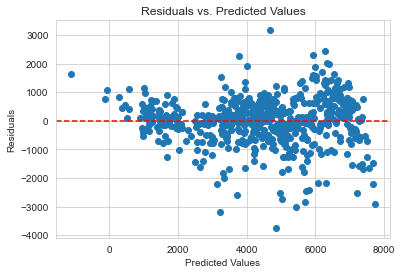

In [57]:
# Linearity
# Visualizing the relationship between predicted values and residuals
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'lr_model' is your fitted regression model and 'X_train' is your training data
fitted_vals = lr_model.predict(sm.add_constant(X_train_sm))
residuals = lr_model.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [58]:
# Independence
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)  # Values close to 2 indicate no autocorrelation


2.03850248473114

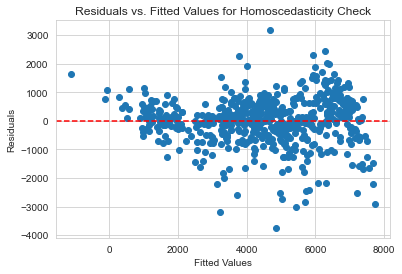

In [59]:
# Homoscedasticity
# Visualizing the residuals vs. fitted values for constant variance
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Homoscedasticity Check')
plt.show()


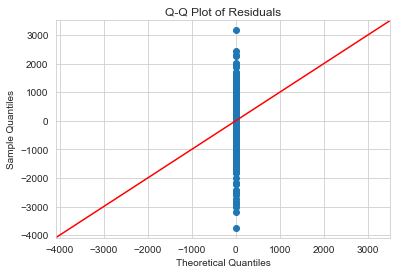

ShapiroResult(statistic=0.9610851407051086, pvalue=2.60848599664687e-11)

In [60]:
# Normality of Residuals
# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test (optional)
from scipy.stats import shapiro
shapiro(residuals)


In [65]:
# Multicollinearity
# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X_train' is your training data without the constant added for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
print(vif_data)


                       Feature        VIF
0                        const  60.211542
1                           yr   1.012265
2                      holiday   1.088015
3                      weekday   1.014587
4                   workingday   1.089879
5                         temp   3.439644
6                    windspeed   1.093747
7                season_spring   4.548809
8                season_summer   1.963401
9                season_winter   2.961192
10  weathersit_light_snow_rain   1.064431
11      weathersit_mist_cloudy   1.033469


# 5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes

In [66]:
import statsmodels.api as sm

# Assuming 'model4' is your fitted regression model
# Print the model's summary to get the coefficients
print(lr_model.summary())

# Get the model's coefficients and their absolute values
coefficients = lr_model.params
coefficients_abs = abs(coefficients)

# Sort the coefficients by their absolute values in descending order
sorted_coefficients = coefficients_abs.sort_values(ascending=False)

# Print the top 3 features contributing to bike demand
print("Top 3 features contributing to bike demand:")
print(sorted_coefficients.head(3))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     232.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          5.91e-203
Time:                        00:57:57   Log-Likelihood:                -4757.3
No. Observations:                 584   AIC:                             9539.
Df Residuals:                     572   BIC:                             9591.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               